# APriori algorithm
## Plot of the results

## Libraries

In [1]:
import pandas as pd
import math
import plotly.express as px     # used to plot the data
import ast                      # used to transform string into list
from collections import Counter # used to count the occurrences of hashtags
from statistics import mean
import string                   # used to remove punctuation from text in an efficient way

import re                       
from tqdm import tqdm           # estimate of time in long for

from wordcloud import WordCloud
import matplotlib.pyplot as plt # used to plot the data

# for script 2
import datetime
from efficient_apriori import apriori
import plotly.graph_objects as go

print("All libreries imported")

All libreries imported


## Import the results dataset

In [2]:
df_path = "../data/results/results_df.pkl"
df = pd.read_pickle(df_path)
df

,itemsets,dates,supports,tot_dates
85,(work),"[2020-07-24, 2020-07-25, 2020-07-26, 2020-07-2...","[0.02711864406779661, 0.02008174871156922, 0.0...",26
27,(go),"[2020-07-24, 2020-07-25, 2020-07-26, 2020-07-2...","[0.04067796610169491, 0.02701261773591612, 0.0...",26
31,(help),"[2020-07-24, 2020-07-25, 2020-07-26, 2020-07-2...","[0.023728813559322035, 0.02932290741069842, 0....",26
75,(us),"[2020-07-24, 2020-07-25, 2020-07-26, 2020-07-2...","[0.030508474576271188, 0.0363722528286239, 0.0...",26
35,(know),"[2020-07-24, 2020-07-25, 2020-07-26, 2020-07-2...","[0.023728813559322035, 0.016112789526686808, 0...",26
...,...,...,...,...
212,(talli),"[2020-07-27, 2020-08-30]","[0.015866666666666668, 0.015761194029850746]",2
218,"(case, day, covid)","[2020-07-27, 2020-08-09]","[0.019333333333333334, 0.0212]",2
7,(close),"[2020-07-24, 2020-08-13]","[0.01694915254237288, 0.0204]",2
230,(chang),"[2020-07-29, 2020-08-07]","[0.015107913669064749, 0.016037735849056604]",2


## Plot of the results
First, a large visual plot.


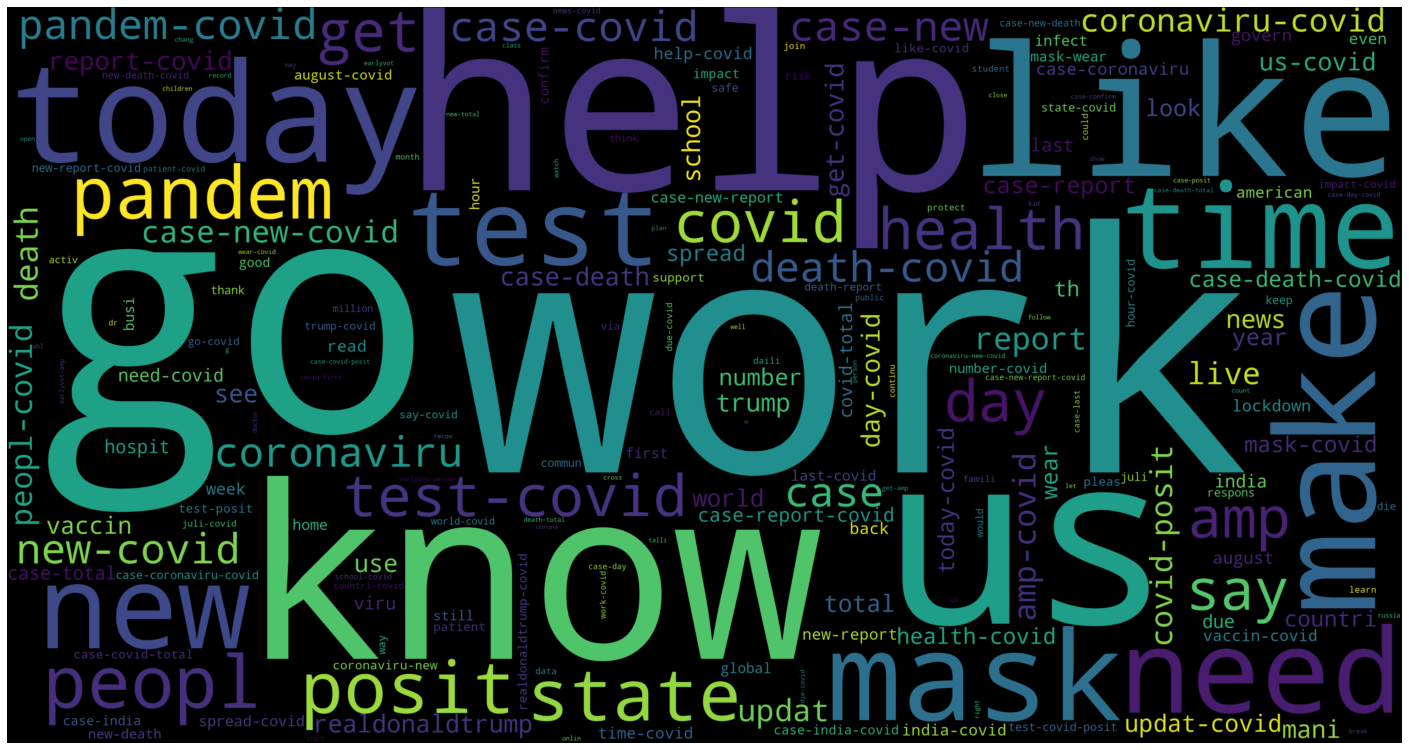

In [4]:
df_to_plot = df[["itemsets", "tot_dates"]]

df_to_plot['itemsets'] = df_to_plot['itemsets'].astype(str)
df_to_plot['itemsets'] = df_to_plot['itemsets'].map(lambda x: x.replace("frozenset({", "").replace("})", "").replace("'", "").replace(", ", "-"))

data = dict(zip(df_to_plot['itemsets'].tolist(), df_to_plot['tot_dates'].tolist()))
wc = WordCloud(width=4096, height=2160, max_words=213).generate_from_frequencies(data)

plt.figure(figsize=(25, 25))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

There is a point in every analysis in which we have to personally look at the data and decide what has more information to us.

After examining the `results_df`, we plot the groups that look more interesting and meaningful.

In [11]:
# general function to plot information given the dataset and the index of the row
def plot_my_data(df, idx):
    dates = df["dates"][idx]
    n = df["supports"][idx]

    fig = go.Figure(data=go.Scatter(x=dates, y=n, mode='lines+markers'))

    fig.update_layout(
        title="Itemset: " + str(df["itemsets"][idx]),
        xaxis_title="Date",
        yaxis_title="Support",
        legend_title="Legend Title",
    )

    fig.show()

## COVID

In [18]:
plot_my_data(df, 14)

## VACCINE

In [19]:
plot_my_data(df, 77)

We notice a spike in the search of vaccine on the 11th of August. This is probably because of the release of the vaccine from Russia. 

## CASE - COVID - NEW

In [20]:
plot_my_data(df, 169)

## CASE - COVID - DEATH

In [21]:
plot_my_data(df, 168)

## TRUMP and THEREALDONALTRUMP

In [23]:
plot_my_data(df, 73)
plot_my_data(df, 55)

The two graphs look pretty similar. This probabily happens because the ones who talk about Trump also tag him in their tweets.

## CASE - COVID - INDIA

In [17]:
plot_my_data(df, 195)